# Nano Degree: Project # 2.

### Import Statements.

In [1]:
import pandas as pd
import numpy as np
import requests
import re
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import math
import matplotlib.dates
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

## Twitter Preparation.

In [2]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

## Step 1: Data Gathering:
* Reading the Twitter archive into a Pandas Dataframe.
* Downloading image_predictions.tsv file programmatically from the URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv using the Requests library.
* using the Twitter API. (Requires an API key not yet created, hence using code from Course Supporting Material).


In [3]:
# reading twitter-archive-enhanced.csv into a Pandas DataFrame
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# downloading the image_predictions.tsv file
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)
file_name = image_predictions_url.split('/')[-1]
if not os.path.isfile('filename.txt'):
    with open(file_name,'wb') as file:
        file.write(response.content)

In [5]:
# read image_predictions.tsv file into a DataFrame.
image_predictions_df = pd.read_csv('image-predictions.tsv',delimiter='\t')

In [6]:
""""
this block of code has been copied from the twitter_api.py 
this file was provided on the project Supporting Materials Section in the 
page 4.Twitter API, this block of code depends on Cell # 5 which currently does not include
the necessery data to run correctly, hence it is being skipped.
""""
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
end = timer()
print(end - start)
print(fails_dict)

SyntaxError: EOL while scanning string literal (<ipython-input-6-59bbef4a08d2>, line 6)

In [7]:
# read tweet_json text into a pandas DataFrame
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count':retweet_count,
                       'favorite_count':fav_count,
                       'user_count': user_count})
api_df = pd.DataFrame(df_list)

## Step 2: Data Assessment

### Visual Assessment
* By Printing Samples of the Data, and Observing them.

### Programmatic Assessment
* By means of using info, describe, head, tail, and sample.
* head, tail will not be run here in order to save space. since their output could be infered from the visual assessment step.

In [8]:
# Visual Assessment:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# Programmatic Assessment of archive_df
archive_df.info()
print('\n**** A Sample of 15 Entries ****\n{}'.format(archive_df.sample(15)))
print('\n**** Value Count for dog stages ****\n')
print('\n**** DOGGO ****\n{}'.format(archive_df.doggo.value_counts()))
print('\n**** FLOOFER ****\n{}'.format(archive_df.floofer.value_counts()))
print('\n**** PUPPER ****\n{}'.format(archive_df.pupper.value_counts()))
print('\n**** PUPPO ****\n{}'.format(archive_df.puppo.value_counts()))
print('\n**** Value Count for dog names ****\n')
print('\n**** DOG Name Value Count ****\n{}'.format(archive_df.name.value_counts()))
print('\n**** archive shape ****\n{}'.format(archive_df.shape))
print('\n**** source value counts ****\n{}'.format(archive_df.source.value_counts()))
print('\n**** value counts for dogs with 2 classifications ****\n{}'.format(archive_df.query('doggo != "None" & floofer !="None"')))
print('\n**** is there duplicated Tweet IDs ****\n{}'.format(archive_df['tweet_id'].duplicated().any()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob


**** value counts for dogs with 2 classifications ****
               tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
200  854010172552949760                    NaN                  NaN   

                     timestamp  \
200  2017-04-17 16:34:26 +0000   

                                                source  \
200  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
200  At first I thought this was a shy doggo, but i...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
200                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
200  https://twitter.com/dog_rates/status/854010172...                11   

     rating_denominator  name  doggo  floofer pupper puppo  
200                  10  None  doggo  floofer   None  None  

**** is there duplicated Tweet IDs ****
False


### Getting to Know the Data:
'Archive DF' columns:
- **tweet_id**: table primary key, unique identifier of each tweet.
- **in_reply_to_status_id**: indicates if a tweet was in reply to another tweet (status), if so will include an integer representation of the original tweet ID.
- **in_reply_to_user_id**: indicates if a tweet was in reply to a user, if so will include an integer representation of the original tweet author.
- **timestamp**: tweet date
- **source**: tweet URL
- **text**: tweet Text/content
- **retweeted_status_id**: indicates if a tweet was a retweet, if so will include an integer representation of original tweet.
- **retweeted_status_user_id**:indicates if a tweet was a retweet, if so will include an integer representation of original tweet author.
- **retweeted_status_timestamp**:indicates if a tweet was a retweet, if so will include a timestamp representation of the origianl tweet time.
- **expanded_urls**:
- **rating_numerator**: 
- **rating_denominator**:
- **name**: dog under consideration name
- **doggo**: a stage of dog,
- **floofer**: a stage of dog,
- **pupper**: a stage of dog,
- **puppo**: a stage of dog,

### Observed Data Quality Issues in DataFrame archive_df
#### Completeness
- only 394 entries, have a dog stage classification
- 745 entries does not have a dog name, None.
- not all records are original tweets (some are retweets).
- expanded_url only has 2297 entries, while it should have 2356
#### Validity
- 55 dog name entries are 'a', indicating the name was not not extracted correctly from the text.
- record 775 have a dog name 'O'
- doggo, floofer, pupper, and puppo uses None (String) instead of empty string
- source record include both the source, and a link for downloading the source.
- Not all tweets are of dogs.
#### Consistency
- timestamp record is an object, instead of datetime.
- some records have more than one stage of dog defined, exmaple record #202
### Observed Data Tidyness Issues in DataFrame archive_df
- Columns dogoo, floofer, pupper, and puppo are variables, and should be a single column stage, which should also be converted to categorical datatype (quality issue)
- columns not useful to the analysis shall be dropped such as columns used to detect if a tweet is original or a retweet.

In [10]:
# Visual Assessment:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
# Programmatic Assessment of image_predictions_df
image_predictions_df.info()
print('\n**** A Sample of 15 Entries ****\n')
image_predictions_df.sample(15)
print('\n**** Table Description ****\n')
image_predictions_df.describe()
print('\n**** confidence Max Value ****\n')
print('\n**** P1 Confidence Max Value ****\n{}'.format(image_predictions_df.p1_conf.max()))
print('\n**** P2 Confidence Max Value ****\n{}'.format(image_predictions_df.p2_conf.max()))
print('\n**** P3 Confidence Max Value ****\n{}'.format(image_predictions_df.p3_conf.max()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB

**** A Sample of 15 Entries ****


**** Table Description ****


**** confidence Max Value ****


**** P1 Confidence Max Value ****
1.0

**** P2 Confidence Max Value ****
0.4880140000000001

**** P3 Confidence Max Value ****
0.273419


### Getting to know the data
- **tweet_id**: reference to the tweet with the picture
- **jpg_url**: URL for the picture being predicted
- **img_num**:
- **p1**: first prediction
- **p1_conf**: confidence in first prediction
- **p1_dog**: boolean indicating if prediction is in fact a dog
- **p2**: second prediction
- **p2_conf**: confidence in second prediction
- **p2_dog**: boolean indicating if prediction is in fact a dog
- **p3**: third prediction
- **p3_conf**: confidence in third prediction
- **p3_dog**: boolean indicating if prediction is in fact a dog.
### Observed Data Quality Issues in DataFrame image_predictions_df

#### Completeness
- Number of Observations in image_predictions_df are less than number of observations in archive_df, therefore not all archived tweets have images.

#### Accuracy
- Some observations have false predictions in all predictions, examlpe entry #2074

### Observed Tidyness Issues in DataFrame image_predictions_df
- Column Names are not describitive 
    - p1 should be prediction 1, p2 should be prediction 2, p3 should be prediction 3
    - conf should be confidence

In [12]:
# Visual Assessment
api_df

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889
5,20562,3261,891087950875897856,3200889
6,12041,2158,890971913173991426,3200889
7,56848,16716,890729181411237888,3200889
8,28226,4429,890609185150312448,3200889
9,32467,7711,890240255349198849,3200889


In [13]:
# Programmatic Assessment
api_df.info()
api_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


,favorite_count,retweet_count,tweet_id,user_count
count,2354.000000,2354.000000,2.354000e+03,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17,3.200942e+06
std,11814.771334,5284.770364,6.852812e+16,4.457302e+01
min,0.000000,0.000000,6.660209e+17,3.200799e+06
25%,1415.000000,624.500000,6.783975e+17,3.200898e+06
50%,3603.500000,1473.500000,7.194596e+17,3.200945e+06
75%,10122.250000,3652.000000,7.993058e+17,3.200953e+06
max,132810.000000,79515.000000,8.924206e+17,3.201018e+06


In [97]:
# Pre Data Cleaning Preparation
# Create Copies of Origianl Data Before Cleaning

archive_df_clean = archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
api_df_clean = api_df.copy()

## Step 3: Data Cleaning

### First Cleaning Directive:  (2 out of 8 Quality Issues in terms of Project Rubric)

Satisfy Project Requirement, of removing all tweets that are not original (retweets), or tweets with no images.

#### Definition
An original Tweet is one that is not a retweet. a retweet is identified by having a retweet_status_id. those must first be deleted.

A tweet that does not have a photo is one that it's ID is not present in the image_predictions DataFrame.

Therefore, we shall first delete all tweets from the archive dataframe that their tweet ID is not present in the image_predictions DataFrame 

Next We Shall delete all tweets that are retweets, by checking the fields

- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id

if they are NaN, then the tweet is original, otherwise it's a retweet, and must be deleted from all dataframes.

#### Code First Directive

In [98]:
# Code Portion for First Cleaning Directive, 
# Delete All Tweets that do not have a picture, and tweets that are retweets. (Quality Issues 1/8 & 2/8)
# This would also fix Quality issue: Number of Observations in image_predictions_df 
# are less than number of observations in archive_df, 
# therefore not all archived tweets have images. (Quality Issue 8/8)

index_tweet_id = archive_df_clean.columns.get_loc('tweet_id')
for row in range(0, len(archive_df_clean)):    
    if archive_df_clean.tweet_id[row] not in image_predictions_df_clean.tweet_id.values:
        archive_df_clean.drop([row], inplace = True)
        
# temp DataFrame, that only includes original tweets.

archive_df_clean_temp = archive_df_clean.query('in_reply_to_status_id != in_reply_to_status_id &'+
                                               'in_reply_to_user_id != in_reply_to_user_id &'+
                                               'retweeted_status_id != retweeted_status_id &'+
                                               'retweeted_status_user_id != retweeted_status_user_id')

# delete from image_predictions, and api_df, that are not in temp DataFrame

for row in range(0, len(image_predictions_df_clean)):
    if image_predictions_df_clean.tweet_id[row] not in archive_df_clean_temp.tweet_id.values:
        image_predictions_df_clean.drop([row], inplace = True)
# Change, noticed a descrebency in the record count between API, and Image Predictions, this could be the result of
# the loop used to clean the two tables did not cover all of api_df, therefore, it was split into two loops.
for row in range(0, len(api_df_clean)):
    if api_df_clean.tweet_id[row] not in archive_df_clean_temp.tweet_id.values:
        api_df_clean.drop([row], inplace = True)

In [99]:
# test portion for First Cleaning Directive
print('Dropping Tweets with no Picture\n After Cleaning {}\n Before Cleaning {}'.format(archive_df_clean.shape,archive_df.shape))
print('**** Dropping Retweets ****')
print('Archived Tweets\n Before Dropping Retweets {} \n After Dropping Retweets {} \n'.format(archive_df_clean.shape,archive_df_clean_temp.shape))
print('Image Predictions\n Before Dropping Retweets {} \n After Dropping Retweets {} \n'.format(image_predictions_df.shape,image_predictions_df_clean.shape))
print('API Df\n Before Dropping Retweets {} \n Adter Dropping Retweets {} \n'.format(api_df.shape, api_df_clean.shape))

# Save New archive_df_clean
archive_df_clean = archive_df_clean_temp


Dropping Tweets with no Picture
 After Cleaning (2075, 17)
 Before Cleaning (2356, 17)
**** Dropping Retweets ****
Archived Tweets
 Before Dropping Retweets (2075, 17) 
 After Dropping Retweets (1971, 17) 

Image Predictions
 Before Dropping Retweets (2075, 12) 
 After Dropping Retweets (1971, 12) 

API Df
 Before Dropping Retweets (2354, 4) 
 Adter Dropping Retweets (1971, 4) 



### Second Cleaning Directive: 
#### Quality Issues:
#### Definitions:
- 3/8 doggo, floofer, pupper, and puppo uses None (String) instead of empty string
this issue can be easily corrected by replacing None, with an empty string.
- 4/8 source record include both the source, and a link for downloading the source application.
this issue can be fixed by means of looking for, and replacing the source strings
- 5/8 timestamp record is an object, instead of datetime in DataFrame archive_df.
this issue can be fixed by means of converting the DataFrame type for the timestamp record. 
- 6/8 Not all Tweets are of dogs
this issue can be fixed by means of droping rows of archive_df, and subsequent tables that include the statement "Please only send in dogs"
- 7/8 Some observations have false predictions in all predictions, examlpe entry #2074 in dataframe image_predictions
this issue can be resolved by removing all tweets with image predictions not identified as dogs, that is all boolean values for predictions are false.
- 8/8  Number of Observations in image_predictions_df are less than number of observations in archive_df, therefore not all archived tweets have images.
this is resolved by fixing Project Motivation of ensuring that only tweets with images and original tweets are considered.
- (9/8) records in archive_df has two or more classifications, hence Not Mutually Execlusive
this issue can be resolved by dropping the record. unless the two classificatins are doggo and pupper (according to the dogtionary, hence for those records, we can remove one of the classificatns.
#### Tidyness
- (1/2) all tables could be merged in a single DataFrame, since all Tables use Tweet ID as the primary key.
##### Project Review Changes: 
- (2/2) Instead of melting predictions, they shall remain separate columns, with chaning the column names to be more discriptive and remove all but top prediction.
Old To Be Changed Comment (15/10/2020)
- (2/2) predictions should be melted since they are observations and not variables.

#### Code Second Directive

In [100]:
# Code for Second Cleaning Directive
# Fixing None for doggo, floofer, pupper and puppo. by replacing None with an empty String (3/8 Qiality Issues)
# (15/10/2020) : Also Replacing Doggo with 1, Floofer with 2, pupper with 3, and puppo with 4
for row in range(0, len(archive_df_clean)):
    if archive_df_clean.iat[row, archive_df_clean.columns.get_loc('doggo')].lower() == 'none':        
        archive_df_clean.iat[row, archive_df_clean.columns.get_loc('doggo')] = 0
    else:
        archive_df_clean.iat[row, archive_df_clean.columns.get_loc('doggo')] = 1        
    if archive_df_clean.iat[row, archive_df_clean.columns.get_loc('floofer')].lower() == 'none':
        archive_df_clean.iat[row, archive_df_clean.columns.get_loc('floofer')] = 0
    else:
        archive_df_clean.iat[row, archive_df_clean.columns.get_loc('floofer')] = 2
    if archive_df_clean.iat[row, archive_df_clean.columns.get_loc('pupper')].lower() == 'none':
        archive_df_clean.iat[row, archive_df_clean.columns.get_loc('pupper')] = 0
    else:
        archive_df_clean.iat[row, archive_df_clean.columns.get_loc('pupper')] = 3
    if archive_df_clean.iat[row, archive_df_clean.columns.get_loc('puppo')].lower() == 'none':
        archive_df_clean.iat[row, archive_df_clean.columns.get_loc('puppo')] = 0
    else:
        archive_df_clean.iat[row, archive_df_clean.columns.get_loc('puppo')] = 4

In [101]:
# Fixing Column 'source' of DataFrame: archive_df_clean (4 out of 8 Quality Issues)
index_source = archive_df_clean.columns.get_loc('source')
# the following pattern has not been used since, a simpler method was followed. 
# the pattern is kept for reference only, in case we wish to reuse it somewhere else.
pattern = r'<a\s+(?:[^>]*?\s+)?href=([\"\'])(.*?)\1 rel=\"nofollow\">'
for row in range(0, len(archive_df_clean)):
    try:
        if archive_df_clean.iloc[row]['source'] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
            archive_df_clean.iat[row, index_source] = 'Twitter for iPhone'
        elif archive_df_clean.iloc[row]['source'] == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
            archive_df_clean.iat[row, index_source] = 'Twitter Web Client'
        elif archive_df_clean.iloc[row]['source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
            archive_df_clean.iat[row, index_source] = 'Vine'
        elif archive_df_clean.iloc[row]['source'] == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
            archive_df_clean.iat[row, index_source] = 'tweetdeck'
        else:
            print('Unexpected source {} at {}'.format(archive_df_clean.iloc[row]['source'], row))        
    except:
        print('error at line {}, source value is {}'.format(row, archive_df_clean.iloc[row]['source']))

In [102]:
# Fixing Column 'timestamp' of archive_df_clean (5/8 Quality Issues)
# because of an error in understanding timezone, this code has been modified to neglect the time zone. and because of 
# time limitation in submitting the project, this code has not been moified to include the timezone in utc format.
archive_df_clean['timestamp'] =  pd.to_datetime(archive_df_clean['timestamp'][:-6], format='%Y-%m-%d %H:%M:%S')

In [103]:
# Removing tweets that are not of dogs (Quality Issue 6/8)
# Similar to fixing the source column, it is the intention to search for the string 'Please only send in dogs' 
# and drop the row in question.
index_text = archive_df_clean.columns.get_loc('text')
index_tweet_id = archive_df_clean.columns.get_loc('tweet_id')
for row in range(0, len(archive_df_clean)):
    if re.search('Please only send in dogs',archive_df_clean.iat[row,index_text]) != None:
        # Match Found delete record from api_df, and image_predictions first.        
        api_df_clean[api_df_clean.tweet_id != archive_df_clean.iat[row,index_tweet_id]]
        image_predictions_df_clean[image_predictions_df_clean.tweet_id != archive_df_clean.iat[row,index_tweet_id]]
        archive_df_clean[archive_df_clean.tweet_id != archive_df_clean.iat[row,index_tweet_id]]

In [104]:
# Removing Tweets whose image predictions state they are not of dogs. (Quality Issue 7/8)
for tweet_id in image_predictions_df_clean.query('p1_dog == False & p2_dog == False & p3_dog == False').tweet_id:
    # delete tweet from api_df_Clean
    api_df_clean = api_df_clean[api_df_clean.tweet_id != tweet_id]
    # delete tweet from archive_df_clean
    archive_df_clean = archive_df_clean[archive_df_clean.tweet_id != tweet_id]
    # delete tweet from image_predictions_df_clean
    image_predictions_df_clean= image_predictions_df_clean[image_predictions_df_clean.tweet_id != tweet_id]
    

In [105]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 17 columns):
tweet_id                      1666 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1660 non-null datetime64[ns]
source                        1666 non-null object
text                          1666 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1666 non-null object
rating_numerator              1666 non-null int64
rating_denominator            1666 non-null int64
name                          1666 non-null object
doggo                         1666 non-null object
floofer                       1666 non-null object
pupper                        1666 non-null object
puppo                         1666 non-null object
dtypes: datetime64[ns](1), float

In [106]:
# Fixing Records with Non Mutually exclusive Classifications, (Quality Issue 9/8 - Part 1) 
# if a dog is classified as both doggo and pupper, as per "THE DOGTIONARY", the record can be labeled as doggo.
# hence removing the pupper classification, and maintaining the record.
for row in range(0,len(archive_df_clean)):    
    if archive_df_clean.iloc[row].doggo == 1 and archive_df_clean.iloc[row].pupper == 3:
        archive_df_clean.iat[row, archive_df_clean.columns.get_loc('pupper')] = 0

In [107]:
# Fixing Records with Non Mutually exclusive Classifications, (Quality Issue 9/8 - Part 2) 
# (15/10/2020) Remember Doggo is 1, Floofer is 2, pupper is 3, and puppo is 4
index_tweet_id = archive_df_clean.columns.get_loc('tweet_id')
tweet_id = None 
for row in range(0,len(archive_df_clean)):
    try:
        if archive_df_clean.iloc[row].doggo == 1 and archive_df_clean.iloc[row].floofer == 2:
            print('doggo and floofer - row {} - dropping record'.format(row))        
            tweet_id = archive_df_clean.iat[row, index_tweet_id]                        
        if archive_df_clean.iloc[row].doggo == 1 and archive_df_clean.iloc[row].puppo == 4:
            print('doggo and puppo - row {} - dropping record'.format(row))
            tweet_id = archive_df_clean.iat[row, index_tweet_id]                
        if archive_df_clean.iloc[row].floofer == 2 and archive_df_clean.iloc[row].puppo == 4:
            print('floofer and puppo - row {}'.format(row))
            tweet_id = archive_df_clean.iat[row, index_tweet_id]                
        if archive_df_clean.iloc[row].floofer == 2 and archive_df_clean.iloc[row].pupper == 3:
            print('floofer and pupper - row {}'.format(row))
            tweet_id = archive_df_clean.iat[row, index_tweet_id]                
        if archive_df_clean.iloc[row].pupper == 3 and archive_df_clean.iloc[row].puppo == 4:
            print('pupper and puppo - row {}'.format(row))
            tweet_id = archive_df_clean.iat[row, index_tweet_id]                
        if tweet_id is not None:
            api_df_clean = api_df_clean[api_df_clean.tweet_id != tweet_id]
            image_predictions_df_clean= image_predictions_df_clean[image_predictions_df_clean.tweet_id != tweet_id]
            archive_df_clean = archive_df_clean[archive_df_clean.tweet_id != tweet_id]
            tweet_id = None
    except:
        print('should do error logging')

doggo and puppo - row 132 - dropping record
doggo and floofer - row 137 - dropping record
should do error logging
should do error logging


In [108]:
# Fixing api_df_Clean size ensuring all tweets in api_df_clean are in image predictions and archive df. 
# (Quality Issue 10/8)
print ('BEFORE FIX - Clean Archive Shape {}\nClean Image Predictions Shape {}\nClean API Shape {}'.format(archive_df_clean.shape, image_predictions_df_clean.shape, api_df_clean.shape))
for row in range(0, len(api_df_clean)):
    try:
        api_tweet_id = api_df_clean.iloc[row].tweet_id    
        if not (api_tweet_id in image_predictions_df_clean.values and api_tweet_id in archive_df_clean.values):        
            api_df_clean = api_df_clean[api_df_clean.tweet_id != api_tweet_id]
    except Exception as e:
        print('error message {}'.format(e))
print ('After FIX - Clean Archive Shape {}\nClean Image Predictions Shape {}\nClean API Shape {}'.format(archive_df_clean.shape, image_predictions_df_clean.shape, api_df_clean.shape))

BEFORE FIX - Clean Archive Shape (1664, 17)
Clean Image Predictions Shape (1664, 12)
Clean API Shape (1664, 4)
After FIX - Clean Archive Shape (1664, 17)
Clean Image Predictions Shape (1664, 12)
Clean API Shape (1664, 4)


In [109]:
# New Quality Issue Added after Project Review : Change Doggo, Floofer, Pupper, and puppo type to float.
archive_df_clean['doggo'] = archive_df_clean['doggo'].astype(str).astype(int)
archive_df_clean['floofer'] = archive_df_clean['floofer'].astype(str).astype(int)
archive_df_clean['pupper'] = archive_df_clean['pupper'].astype(str).astype(int)
archive_df_clean['puppo'] = archive_df_clean['puppo'].astype(str).astype(int)

In [110]:
# (15/10/2020) Concatenate all Dog Classifications into a new column.
archive_df_clean['dog_stage'] = archive_df_clean['doggo'] + archive_df_clean['floofer'] + archive_df_clean['pupper'] + archive_df_clean['puppo']

In [111]:
# (15/10/2020) Remove the original 4 columns of dog stages
archive_df_clean.drop(['doggo','floofer','pupper','puppo'], axis='columns', inplace=True)

In [112]:
archive_df_clean.info()
archive_df_clean[archive_df_clean.dog_stage != 0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 1 to 2355
Data columns (total 14 columns):
tweet_id                      1664 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1658 non-null datetime64[ns]
source                        1664 non-null object
text                          1664 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1664 non-null object
rating_numerator              1664 non-null int64
rating_denominator            1664 non-null int64
name                          1664 non-null object
dog_stage                     1664 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 195.0+ KB


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,4
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,4
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,3
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,1
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,2
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41,Twitter for iPhone,This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,3
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,3
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,4
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33,Twitter for iPhone,This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,3


In [113]:
# (15/10/2020) cleaning names Replacing all names that are a single character with None.
for row in range(0,len(archive_df_clean)):
    if archive_df_clean.iloc[row]['name'] != None:
        if len(archive_df_clean.iloc[row]['name']) == 1:
            # print('row: {}, name: {}'.format(row, archive_df_clean.iloc[row]['name']))
            # archive_df_clean.iloc[row]['name'] == None
            archive_df_clean.iat[row, archive_df_clean.columns.get_loc('name')] = None

In [114]:
# Decimal Rating
# (15/10/2020) From Project Review :The rating_numerator column should of type float
# and also it should be correctly extracted. On assessing the twitter_enhanced.csv
# file you will see on row 46 that the correct rating in the tweet is 13.5 but it's extracted
# as 5. There are many more such issues in the dataset. So it should be extracted and cleaned correctly.
archive_df_clean['rating_numerator'] = archive_df_clean['rating_numerator'].astype(float)
archive_df_clean['rating_denominator'] = archive_df_clean['rating_denominator'].astype(float)
for row in range(0, len(archive_df_clean)):
    try:
        match_result = re.findall(r"\d+\.?\d*/10", archive_df_clean.iat[row,archive_df_clean.columns.get_loc('text')])    
        archive_df_clean.iat[row,archive_df_clean.columns.get_loc('rating_numerator')] = match_result[0].split("/")[0]
        archive_df_clean.iat[row,archive_df_clean.columns.get_loc('rating_denominator')] = match_result[0].split("/")[1]
    except Exception as e:
        print('check row {} Exception {}'.format(row, e))

check row 287 Exception list index out of range
check row 343 Exception list index out of range
check row 587 Exception list index out of range
check row 833 Exception list index out of range
check row 852 Exception list index out of range
check row 869 Exception list index out of range
check row 927 Exception list index out of range
check row 992 Exception list index out of range
check row 1131 Exception list index out of range
check row 1239 Exception list index out of range
check row 1288 Exception list index out of range


In [115]:
# Check for Values where the denominator is more that 10
archive_df_clean[archive_df_clean['rating_denominator'] > 10]
# fix Values by deviding the numerator by 10, and setting the denominator to 10
col_numerator = archive_df_clean.columns.get_loc('rating_numerator')
col_denominator  = archive_df_clean.columns.get_loc('rating_denominator')

for row in range (0,len(archive_df_clean[archive_df_clean['rating_denominator'] > 10])):
    archive_df_clean.iat[row,col_numerator] = archive_df_clean.iat[row,col_numerator] / 10
    archive_df_clean.iat[row,col_denominator] = 10

#### Testing

In [116]:
# Test for Second Cleaning Directive
#Checking there are no Dogs classified as None
# (15/10/2020) Following Testing is no Longer Applicable 
#print('/n **** Dogs with None instead of empty string in classification **** /n ')
#print(archive_df_clean.query('doggo in ("None", "none")'+
#                             '| floofer in ("None", "none")'+
#                             '| pupper in ("None", "none")'+
#                             '| puppo in ("None", "none")'))
# Checking Column source of the archive_df_clean
print('Archive DF Clean Source Value Counts \n{}'.format(archive_df_clean.source.value_counts()))
# Checking timestamp type
archive_df_clean.info()
# check that no more 'Please only send in dogs' are present
print('{}'.format(archive_df_clean.query('"Please only send in dogs" in text')))
# check there are no more image predictions where all predictions are not of dogs
print('{}'.format(image_predictions_df_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')))
# Testing Non Mutually exclusive classifications - No longer applicable all stages are in a single column
print ('Clean Archive Shape {}\nClean Image Predictions Shape {}\nClean API Shape {}'.format(archive_df_clean.shape, image_predictions_df_clean.shape, api_df_clean.shape))

Archive DF Clean Source Value Counts 
Twitter for iPhone    1633
Twitter Web Client      22
tweetdeck                9
Name: source, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 1 to 2355
Data columns (total 14 columns):
tweet_id                      1664 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1658 non-null datetime64[ns]
source                        1664 non-null object
text                          1664 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1664 non-null object
rating_numerator              1664 non-null float64
rating_denominator            1664 non-null float64
name                          1617 non-null object
dog_stage                     1664 non-null int64
dtypes: datetime64[ns](1), float64(6

### Tidyness

In [131]:
# Make New Copies for Tidiness, in case we need to revert back.
archive_tidy = archive_df_clean.copy() 
image_predictions_tidy = image_predictions_df_clean.copy()
api_tidy = api_df_clean.copy()

In [132]:
# (1/2) all tables could be merged in a single DataFrame, since all Tables use Tweet ID as the primary key.
# Sub Step 1 : Will First Clean Useless columns from archive_df_clean
archive_tidy.drop(['in_reply_to_status_id','in_reply_to_user_id','expanded_urls','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1, inplace = True)
# Comment from Project Review : Instead of merging predictions, merge the dog stage columns.
# (2/2) predictions should be melted since they are observations and not variables.

In [133]:
# (15/10/2020) No Longer Applicable, sine all Classifications have been concatenated in dog_stage. 
# and other classification columns have been deleted.
#for row in range(r, len(archive_df_clean)):
#    if archive_df_clean['doggo']=''
# Sub Step 2 : Melting doggo, floofer, pupper, and puppo columns.
#archive_df_clean= pd.melt(archive_df_clean,
#id_vars = ['tweet_id','timestamp','source','text','rating_numerator','rating_denominator','name'],
#value_vars = ['doggo','floofer','pupper','puppo'], var_name = 'classification',value_name='type')

In [133]:
archive_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 1 to 2355
Data columns (total 8 columns):
tweet_id              1664 non-null int64
timestamp             1658 non-null datetime64[ns]
source                1664 non-null object
text                  1664 non-null object
rating_numerator      1664 non-null float64
rating_denominator    1664 non-null float64
name                  1617 non-null object
dog_stage             1664 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 117.0+ KB


In [134]:
# (15/10/2020) Remember Doggo is 1, Floofer is 2, pupper is 3, and puppo is 4
archive_tidy.dog_stage.value_counts()

0    1409
3     166
1      61
4      21
2       7
Name: dog_stage, dtype: int64

In [135]:
image_predictions_tidy.info()
image_predictions_tidy.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1664 non-null int64
jpg_url     1664 non-null object
img_num     1664 non-null int64
p1          1664 non-null object
p1_conf     1664 non-null float64
p1_dog      1664 non-null bool
p2          1664 non-null object
p2_conf     1664 non-null float64
p2_dog      1664 non-null bool
p3          1664 non-null object
p3_conf     1664 non-null float64
p3_dog      1664 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 134.9+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
592,679462823135686656,https://pbs.twimg.com/media/CW3v1KxW8AAIOuy.jpg,1,toy_poodle,0.621780,True,miniature_poodle,0.197819,True,soft-coated_wheaten_terrier,0.046745,True
669,683078886620553216,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,koala,0.141432,False,Eskimo_dog,0.094044,True,wallaby,0.085237,False
1442,775364825476165632,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True
1388,766313316352462849,https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg,1,toy_poodle,0.966896,True,miniature_poodle,0.016424,True,cocker_spaniel,0.010227,True
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True


In [136]:
# Sub Step 3 Melting image_predictions_df_clean <-- Shall not be done, shall only rename.
# Rename Columns so as to be more descriptive 
image_predictions_tidy.rename(columns={"p1":"prediction_1",
                                           "p2":"prediction_2","p3":"prediction_3",
                                           "p1_conf":"p1_confidence","p2_conf":"p2_confidence",
                                           "p3_conf":"p3_confidence",
                                           "p1_dog":"p1_is_dog","p2_dog":"p2_is_dog",
                                           "p3_dog":"p3_is_dog"}, inplace=True)


In [241]:
# Even Though no longer required, as per Project Review, keeping the code as an exmaple
# for later usage by myself.
# Melt image_predictions
# Image predictions contains a number of records that needs melting, 
# in order to do that we will first create sub tables, of the original melt said sub tables, and then 
# merge the resulting melted sub tables.

# First Sub Table to include the predictions.
# image_predictions_df_clean_1 = image_predictions_df_clean.copy()
# image_predictions_df_clean_1.drop(['p1_confidence','p2_confidence','p3_confidence','p1_is_dog','p2_is_dog','p3_is_dog'],axis=1,inplace=True)
# image_predictions_df_clean_1.rename(columns={'prediction_1':1,'prediction_2':2,'prediction_3':3},inplace=True)
# image_predictions_df_clean_1 = pd.melt(image_predictions_df_clean_1, 
#                                        id_vars = ['tweet_id','jpg_url','img_num'],
#                                       value_vars = [1,2,3],
#                                        var_name = 'prediction_no',
#                                       value_name ='prediction').sort_values('tweet_id')
# image_predictions_df_clean_1.head(9)

# Second Sub Table to include the confidence
# image_predictions_df_clean_2 = image_predictions_df_clean.copy()
# image_predictions_df_clean_2.drop(['prediction_1','prediction_2','prediction_3','p1_is_dog','p2_is_dog','p3_is_dog','jpg_url','img_num'],axis=1,inplace=True)
# image_predictions_df_clean_2.rename(columns={'p1_confidence':1,'p2_confidence':2,'p3_confidence':3},inplace=True)
# image_predictions_df_clean_2 = pd.melt(image_predictions_df_clean_2, 
#                                       id_vars = ['tweet_id'],
#                                      value_vars = [1,2,3],
#                                       var_name = 'confidence_no',
#                                       value_name ='confidence').sort_values('tweet_id')
# image_predictions_df_clean_2.head(9)

# Third Sub Table to include the boolean value if the prediction is a dog.
# image_predictions_df_clean_3 = image_predictions_df_clean.copy()
# image_predictions_df_clean_3.drop(['prediction_1','prediction_2','prediction_3','p1_confidence','p2_confidence','p3_confidence','jpg_url','img_num'],axis=1,inplace=True)
# image_predictions_df_clean_3.rename(columns={'p1_is_dog':1,'p2_is_dog':2,'p3_is_dog':3},inplace=True)
# image_predictions_df_clean_3 = pd.melt(image_predictions_df_clean_3, 
#                                       id_vars = ['tweet_id'],
#                                      value_vars = [1,2,3],
#                                       var_name = 'is_dog_no',
#                                      value_name ='is_dog').sort_values('tweet_id')
# image_predictions_df_clean_3.head(9)

# Merging Sub Tables 2 and 3
# image_predictions_df_clean_2.rename(columns={'confidence_no':'no'},inplace=True)
# image_predictions_df_clean_3.rename(columns={'is_dog_no':'no'},inplace=True)
# image_predictions_df_clean_m1 = pd.merge(image_predictions_df_clean_2, image_predictions_df_clean_3, how = 'inner', on=['tweet_id','no'])
# image_predictions_df_clean_m1.head(9)

# Merging First Merged Table, and final non Merged Table.
# image_predictions_df_clean_1.rename(columns={'prediction_no':'no'},inplace=True)
# image_predictions_df_clean_m2 = pd.merge(image_predictions_df_clean_1,image_predictions_df_clean_m1,how = 'inner', on=['tweet_id','no'])
# image_predictions_df_clean_m2.head(9)

# Dropping "no" Columns.
# image_predictions_df_clean = image_predictions_df_clean_m2.drop('no',axis=1,inplace=False)
# image_predictions_df_clean.head(9)

In [137]:
# Merging api_df_Clean with image_predictions_df_clean
merged_dfs = pd.merge(image_predictions_tidy, api_tidy, how='inner', on='tweet_id')
merged_dfs.head(9)

,tweet_id,jpg_url,img_num,prediction_1,p1_confidence,p1_is_dog,prediction_2,p2_confidence,p2_is_dog,prediction_3,p3_confidence,p3_is_dog,favorite_count,retweet_count,user_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2535,532,3201018
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,132,48,3201018
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,128,47,3201018
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,311,147,3201018
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111,41,3201018
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,136,60,3201018
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,448,261,3201018
7,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,304,146,3201018
8,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,115,61,3201018


In [138]:
merged_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 15 columns):
tweet_id          1664 non-null int64
jpg_url           1664 non-null object
img_num           1664 non-null int64
prediction_1      1664 non-null object
p1_confidence     1664 non-null float64
p1_is_dog         1664 non-null bool
prediction_2      1664 non-null object
p2_confidence     1664 non-null float64
p2_is_dog         1664 non-null bool
prediction_3      1664 non-null object
p3_confidence     1664 non-null float64
p3_is_dog         1664 non-null bool
favorite_count    1664 non-null int64
retweet_count     1664 non-null int64
user_count        1664 non-null int64
dtypes: bool(3), float64(3), int64(5), object(4)
memory usage: 173.9+ KB


In [139]:
# Keep only Highest Prediction in merged DataFrame.
# (15/10/2020) Project Review, Since predictions are individual separate values, 
# they are orderwise prediction of an algorithm and represent the top 3 predictions
# therefore, I shall add two extra columns the "best_bet_breed", and the best_bet_is_dog, 
# according to the highest confidence

confidence_1_index = merged_dfs.columns.get_loc('p1_confidence')
confidence_2_index = merged_dfs.columns.get_loc('p2_confidence')
confidence_3_index = merged_dfs.columns.get_loc('p3_confidence')

best_bet_breed = []
best_bet_is_dog = []

for row in range(0,len(merged_dfs)):

    highest_confidence_column = 0
    if merged_dfs.iat[row, confidence_1_index] > merged_dfs.iat[row, confidence_2_index]:
        if merged_dfs.iat[row, confidence_1_index] > merged_dfs.iat[row, confidence_3_index]:
            # first value is highest confidence value.
            best_bet_breed.append(merged_dfs.iat[row,merged_dfs.columns.get_loc('prediction_1')])
            best_bet_is_dog.append(merged_dfs.iat[row,merged_dfs.columns.get_loc('p1_is_dog')])
            
        else:
            # Third Value is highest confidence value.            
            best_bet_breed.append(merged_dfs.iat[row,merged_dfs.columns.get_loc('prediction_3')])
            best_bet_is_dog.append(merged_dfs.iat[row,merged_dfs.columns.get_loc('p3_is_dog')])
    else:
        if merged_dfs.iat[row, confidence_2_index] > merged_dfs.iat[row, confidence_3_index] and p2_is_dog:
            # Second Value is highest confidence value.
            best_bet_breed.append(merged_dfs.iat[row,merged_dfs.columns.get_loc('prediction_2')])
            best_bet_is_dog.append(merged_dfs.iat[row,merged_dfs.columns.get_loc('p2_is_dog')])
        else:
            # Third Value is highest confidence value.
            best_bet_breed.append(merged_dfs.iat[row,merged_dfs.columns.get_loc('prediction_3')])
            best_bet_is_dog.append(merged_dfs.iat[row,merged_dfs.columns.get_loc('p3_is_dog')])
            
merged_dfs['best_bet_breed'] = best_bet_breed
merged_dfs['best_bet_is_dog'] = best_bet_is_dog

In [140]:
merged_dfs.head(20)

,tweet_id,jpg_url,img_num,prediction_1,p1_confidence,p1_is_dog,prediction_2,p2_confidence,p2_is_dog,prediction_3,p3_confidence,p3_is_dog,favorite_count,retweet_count,user_count,best_bet_breed,best_bet_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2535,532,3201018,Welsh_springer_spaniel,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,132,48,3201018,redbone,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,128,47,3201018,German_shepherd,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,311,147,3201018,Rhodesian_ridgeback,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111,41,3201018,miniature_pinscher,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,136,60,3201018,Bernese_mountain_dog,True
6,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,448,261,3201018,chow,True
7,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,304,146,3201018,shopping_cart,False
8,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,115,61,3201018,miniature_poodle,True
9,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,496,232,3201018,golden_retriever,True


In [142]:
# Having Merged Image Predictions, and API dF, we can now merge the final dataframe.
twitter_archive_master = pd.merge(archive_tidy.sort_values('tweet_id'), merged_dfs.sort_values('tweet_id'),how='inner',on='tweet_id')

In [143]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 24 columns):
tweet_id              1664 non-null int64
timestamp             1658 non-null datetime64[ns]
source                1664 non-null object
text                  1664 non-null object
rating_numerator      1664 non-null float64
rating_denominator    1664 non-null float64
name                  1617 non-null object
dog_stage             1664 non-null int64
jpg_url               1664 non-null object
img_num               1664 non-null int64
prediction_1          1664 non-null object
p1_confidence         1664 non-null float64
p1_is_dog             1664 non-null bool
prediction_2          1664 non-null object
p2_confidence         1664 non-null float64
p2_is_dog             1664 non-null bool
prediction_3          1664 non-null object
p3_confidence         1664 non-null float64
p3_is_dog             1664 non-null bool
favorite_count        1664 non-null int64
retweet_count         1664 non

In [144]:
# check if the master archive has any non dog data, in the best_bet_is_dog column
twitter_archive_master.query('best_bet_is_dog == False')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2_confidence,p2_is_dog,prediction_3,p3_confidence,p3_is_dog,favorite_count,retweet_count,user_count,best_bet_breed,best_bet_is_dog
7,666057090499244032,2015-11-16 00:55:59,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,9.0,10.0,None,0,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,...,0.014594,False,golden_retriever,0.007959,True,304,146,3201018,shopping_cart,False
18,666337882303524864,2015-11-16 19:31:45,Twitter for iPhone,This is an extremely rare horned Parthenon. No...,9.0,10.0,an,0,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,...,0.278407,True,groenendael,0.102643,True,204,96,3201018,ox,False
27,666430724426358785,2015-11-17 01:40:41,Twitter for iPhone,Oh boy what a pup! Sunglasses take this one to...,6.0,10.0,None,0,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,...,0.104109,True,dingo,0.062071,False,330,204,3201017,llama,False
37,666776908487630848,2015-11-18 00:36:17,Twitter for iPhone,This is Josep. He is a Rye Manganese mix. Can ...,5.0,10.0,Josep,0,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,...,0.167175,True,Chihuahua,0.086951,True,368,186,3201018,seat_belt,False
43,666996132027977728,2015-11-18 15:07:24,Twitter for iPhone,This is Carll. He wants to be a donkey. But al...,10.0,10.0,Carll,0,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,...,0.062490,True,water_buffalo,0.048425,False,258,102,3201018,hay,False
72,667524857454854144,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Ra...,12.0,10.0,None,0,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,...,0.092435,False,Chesapeake_Bay_retriever,0.088122,True,1798,1198,3201016,hare,False
82,667806454573760512,2015-11-20 20:47:20,Twitter for iPhone,This is Filup. He is overcome with joy after f...,10.0,10.0,Filup,0,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,...,0.187155,True,Brabancon_griffon,0.112799,True,1111,535,3201016,toyshop,False
85,667878741721415682,2015-11-21 01:34:35,Twitter for iPhone,This is Tedrick. He lives on the edge. Needs s...,2.0,10.0,Tedrick,0,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,...,0.106003,True,schipperke,0.104733,True,409,127,3201015,seat_belt,False
89,667915453470232577,2015-11-21 04:00:28,Twitter for iPhone,Meet Otis. He is a Peruvian Quartzite. Pic spo...,10.0,10.0,Otis,0,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,...,0.196655,True,terrapin,0.160983,False,222,59,3201015,leatherback_turtle,False
98,668256321989451776,2015-11-22 02:34:57,Twitter for iPhone,This is Jareld. Jareld rules these waters. Lad...,13.0,10.0,Jareld,0,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,...,0.115550,False,Pembroke,0.094429,True,1385,667,3201015,canoe,False


In [145]:
# Delete all rows (203 rows) where best bet breed is not a dog.
twitter_archive_master = twitter_archive_master[twitter_archive_master['best_bet_is_dog'] != False]

In [146]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1663
Data columns (total 24 columns):
tweet_id              1461 non-null int64
timestamp             1455 non-null datetime64[ns]
source                1461 non-null object
text                  1461 non-null object
rating_numerator      1461 non-null float64
rating_denominator    1461 non-null float64
name                  1417 non-null object
dog_stage             1461 non-null int64
jpg_url               1461 non-null object
img_num               1461 non-null int64
prediction_1          1461 non-null object
p1_confidence         1461 non-null float64
p1_is_dog             1461 non-null bool
prediction_2          1461 non-null object
p2_confidence         1461 non-null float64
p2_is_dog             1461 non-null bool
prediction_3          1461 non-null object
p3_confidence         1461 non-null float64
p3_is_dog             1461 non-null bool
favorite_count        1461 non-null int64
retweet_count         1461 non

### Testing for Tidyness

In [148]:
# Checking that All Dog Classification have been Melted
archive_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 1 to 2355
Data columns (total 8 columns):
tweet_id              1664 non-null int64
timestamp             1658 non-null datetime64[ns]
source                1664 non-null object
text                  1664 non-null object
rating_numerator      1664 non-null float64
rating_denominator    1664 non-null float64
name                  1617 non-null object
dog_stage             1664 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 117.0+ KB


In [149]:
# Checking that All Predictions have been Melted
image_predictions_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id         1664 non-null int64
jpg_url          1664 non-null object
img_num          1664 non-null int64
prediction_1     1664 non-null object
p1_confidence    1664 non-null float64
p1_is_dog        1664 non-null bool
prediction_2     1664 non-null object
p2_confidence    1664 non-null float64
p2_is_dog        1664 non-null bool
prediction_3     1664 non-null object
p3_confidence    1664 non-null float64
p3_is_dog        1664 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 134.9+ KB


In [150]:
# Checking that a Master Data Set Has Been Created
print('Archive Master Info\n{}'.format(twitter_archive_master.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1663
Data columns (total 24 columns):
tweet_id              1461 non-null int64
timestamp             1455 non-null datetime64[ns]
source                1461 non-null object
text                  1461 non-null object
rating_numerator      1461 non-null float64
rating_denominator    1461 non-null float64
name                  1417 non-null object
dog_stage             1461 non-null int64
jpg_url               1461 non-null object
img_num               1461 non-null int64
prediction_1          1461 non-null object
p1_confidence         1461 non-null float64
p1_is_dog             1461 non-null bool
prediction_2          1461 non-null object
p2_confidence         1461 non-null float64
p2_is_dog             1461 non-null bool
prediction_3          1461 non-null object
p3_confidence         1461 non-null float64
p3_is_dog             1461 non-null bool
favorite_count        1461 non-null int64
retweet_count         1461 non

In [151]:
twitter_archive_master.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2_confidence,p2_is_dog,prediction_3,p3_confidence,p3_is_dog,favorite_count,retweet_count,user_count,best_bet_breed,best_bet_is_dog
863,718939241951195136,2016-04-09 23:10:47,Twitter for iPhone,This is Otis. Everybody look at Otis. 12/10 wo...,12.0,10.0,Otis,0,https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg,1,...,0.222126,True,toilet_tissue,0.006757,False,5720,1973,3200944,Pembroke,True
403,676936541936185344,2015-12-16 01:27:03,Twitter for iPhone,Here we see a rare pouched pupper. Ample stora...,8.0,10.0,None,3,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,1,...,0.081482,True,space_heater,0.047391,False,13809,5515,3201001,Chesapeake_Bay_retriever,True
229,671520732782923777,2015-12-01 02:46:33,Twitter for iPhone,Meet Alejandro. He's an extremely seductive pu...,10.0,10.0,Alejandro,0,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,1,...,0.135262,True,gibbon,0.061557,False,1499,582,3201007,Pomeranian,True
824,712717840512598017,2016-03-23 19:09:09,Twitter for iPhone,Please don't send in any more polar bears. We ...,10.0,10.0,None,0,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,...,0.121375,True,Irish_wolfhound,0.049524,True,13474,5616,3200947,Great_Pyrenees,True
1209,785872687017132033,2016-10-11 16:00:24,Twitter for iPhone,Meet Rusty. He appears to be rather h*ckin flu...,12.0,10.0,Rusty,0,https://pbs.twimg.com/ext_tw_video_thumb/78587...,1,...,0.198358,True,Pekinese,0.143328,True,7489,2130,3200901,Great_Pyrenees,True
189,670704688707301377,2015-11-28 20:43:53,Twitter for iPhone,Meet Danny. He's too good to look at the road ...,6.0,10.0,Danny,0,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,...,0.351876,True,Norfolk_terrier,0.051094,True,814,405,3201009,Norwich_terrier,True
1208,785533386513321988,2016-10-10 17:32:08,Twitter for iPhone,This is Dallas. Her tongue is ridiculous. 11/1...,11.0,10.0,Dallas,0,https://pbs.twimg.com/media/CubGchjXEAA6gpw.jpg,2,...,0.258049,True,Rottweiler,0.145231,True,10183,2334,3200901,miniature_pinscher,True
675,697943111201378304,2016-02-12 00:39:39,Twitter for iPhone,This is Cassie. She goes door to door trying t...,10.0,10.0,Cassie,0,https://pbs.twimg.com/media/Ca-XjfiUsAAUa8f.jpg,1,...,0.110037,True,German_short-haired_pointer,0.090816,True,2638,776,3200950,Great_Dane,True
10,666071193221509120,2015-11-16 01:52:02,Twitter for iPhone,Here we have a northern speckled Rhododendron....,9.0,10.0,None,0,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,...,0.174201,True,Pekinese,0.109454,True,154,67,3201018,Gordon_setter,True
330,674468880899788800,2015-12-09 06:01:26,Twitter for iPhone,This is Louis. He thinks he's flying. 13/10 th...,13.0,10.0,Louis,0,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,...,0.283647,True,toy_poodle,0.067665,True,6676,2275,3201003,chow,True


### Step 4: Data Storage
One way: single file twitter_archive_master (single file, with all data)
do not forget index=False.
Alternative method 
Twitter_archive_master.csv (image + api)
prediction_file 


In [152]:
# Saving all Data to a single CSV File:twitter_archive_master.csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index = True)

### Step 5: Analysis, Visualization, and Reporting


Insights (Conclusions) drawn from the analysis 
the owner of the weRateDogs account mostly use an iphone to perform his tweets. to a lesser extent the user makes use of a PC in very rare cases. 
insight : Most Used Device
insight : Most Sent Breed for Rating.
insight : Effect of rating on retweets, and favoring
Analysis : Most Retweeted Breed, Least Retweeted Breed, Most Liked Breed, Least Liked Breed, 

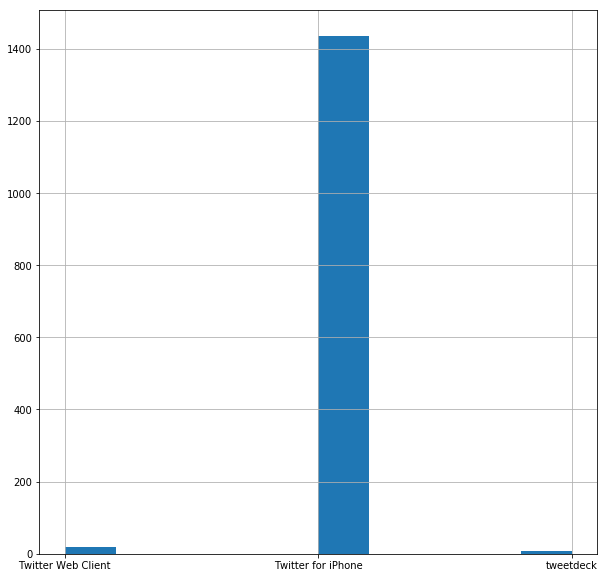

In [153]:
twitter_archive_master['source'].hist(figsize=(10,10));

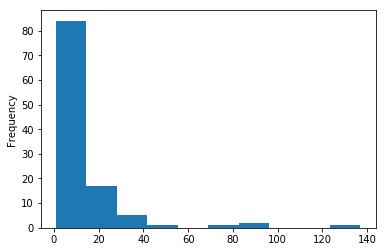

In [180]:
twitter_archive_master['best_bet_breed'].value_counts().plot(kind='hist');

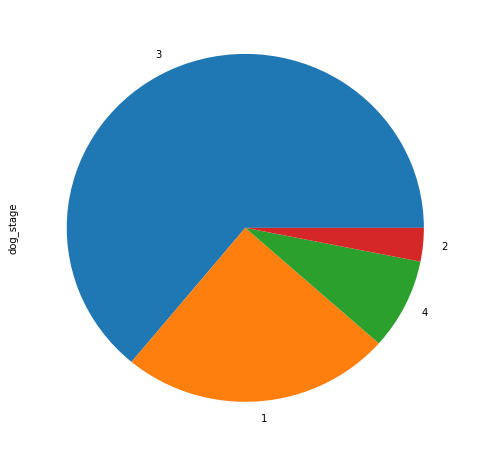

In [172]:
twitter_archive_master[twitter_archive_master['dog_stage'] != 0]['dog_stage'].value_counts().plot(kind='pie',figsize=(8,8));

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


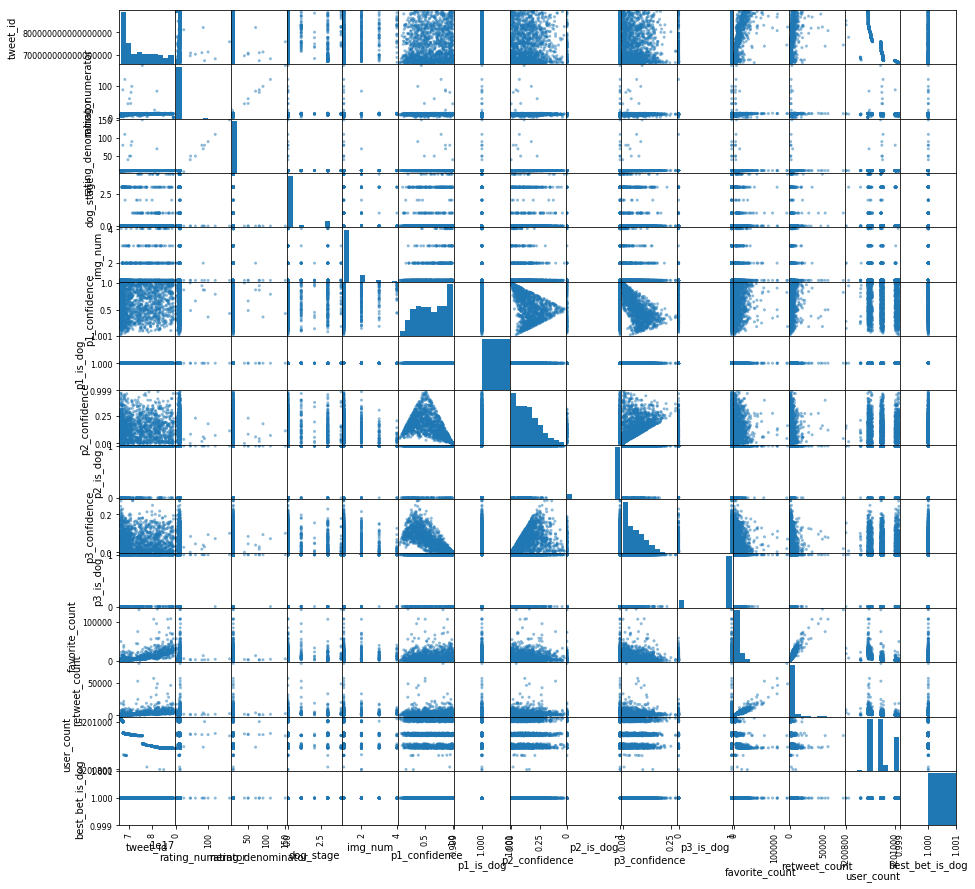

In [155]:
pd.plotting.scatter_matrix(twitter_archive_master,figsize=(15,15));

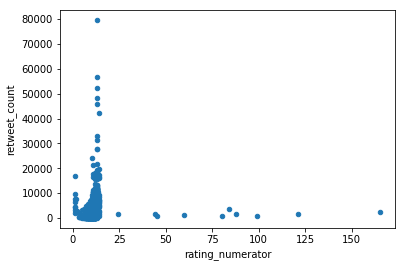

In [156]:
twitter_archive_master.plot(y='retweet_count',x='rating_numerator',kind='scatter');

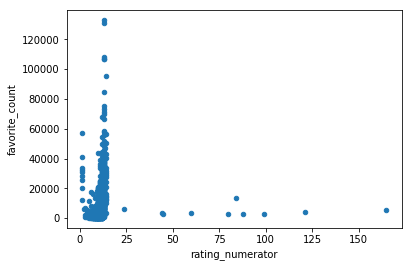

In [157]:
twitter_archive_master.plot(y='favorite_count',x='rating_numerator',kind='scatter');

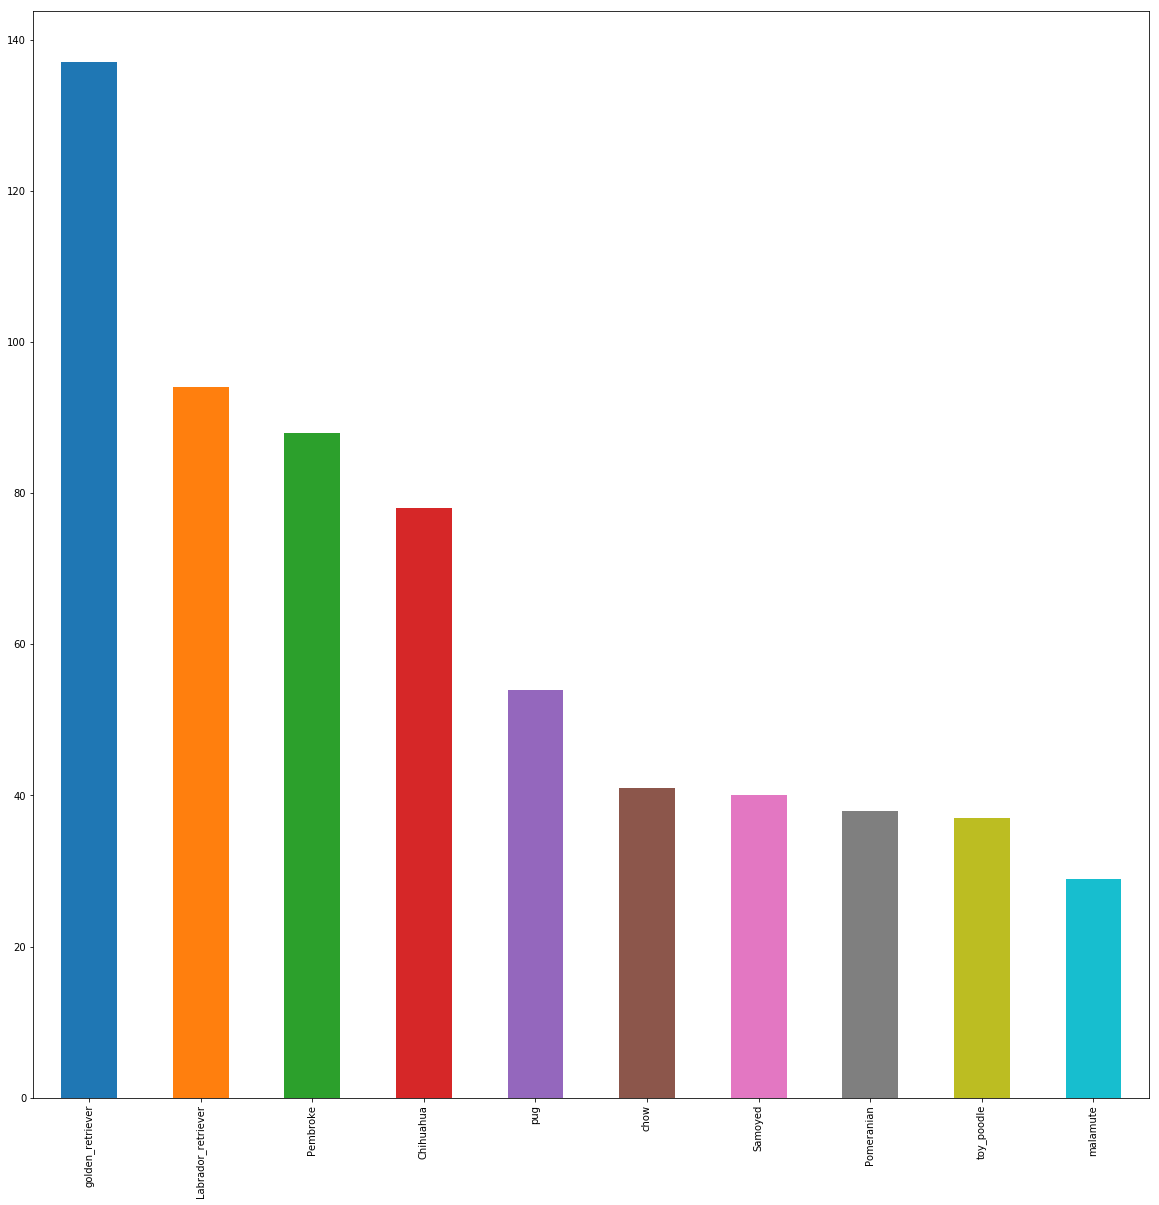

In [175]:
twitter_archive_master['best_bet_breed'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(20,20));

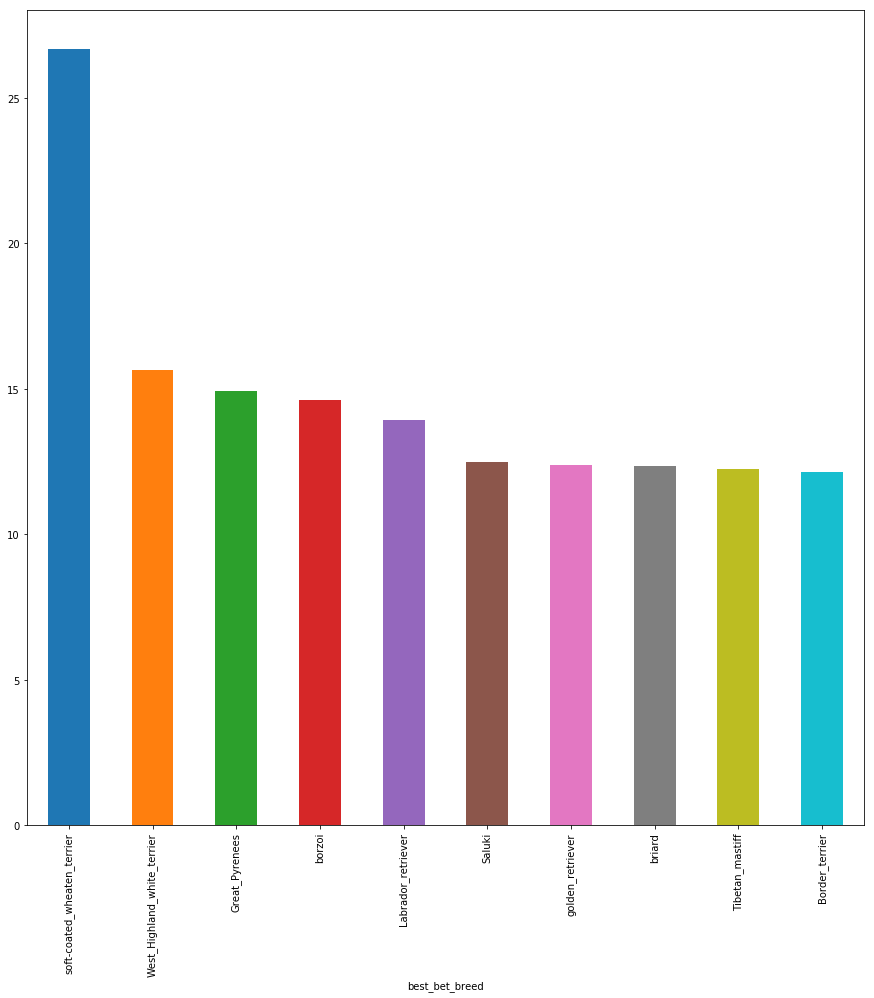

In [176]:
twitter_archive_master.groupby('best_bet_breed')['rating_numerator'].mean().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(15,15));

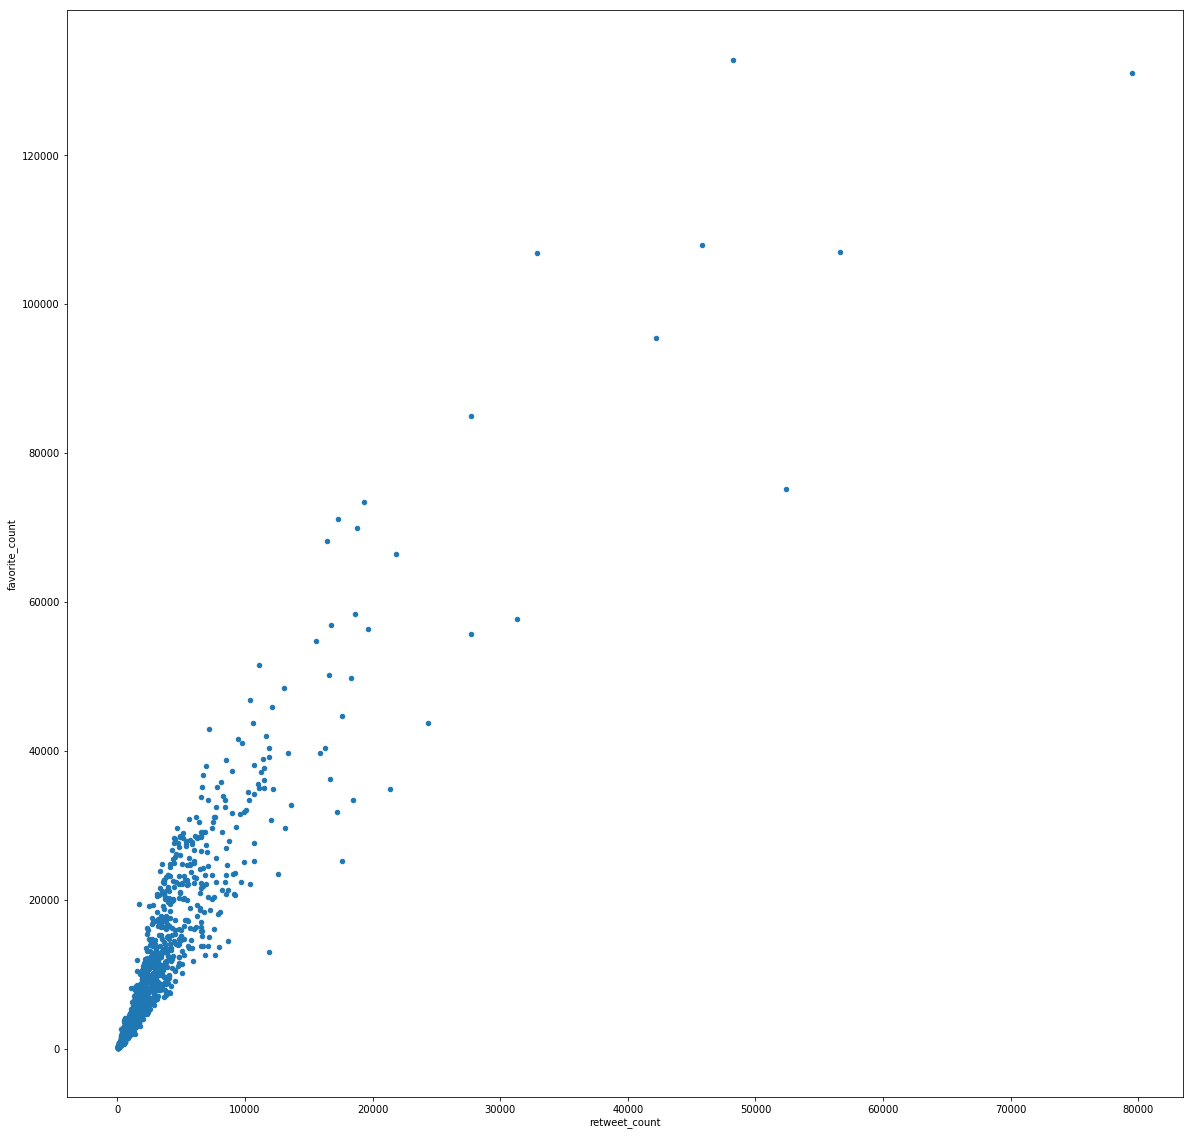

In [181]:
twitter_archive_master.plot(y='favorite_count',x='retweet_count',kind='scatter',figsize=(20,20));